<a href="https://colab.research.google.com/github/khalid-Ibne-Hussain/plant-disease-detection/blob/main/Code_of_Train_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Compatibility check

In [ ]:
import tensorflow as tf
print("TF version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))


TF version: 2.19.0
GPUs: []


In [ ]:
!nvidia-smi


Sun Feb 15 14:14:38 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

BASE_DIR = "/content/drive/MyDrive/plant_disease"
print("BASE exists:", os.path.exists(BASE_DIR))
print("train exists:", os.path.exists(os.path.join(BASE_DIR, "train")))
print("valid exists:", os.path.exists(os.path.join(BASE_DIR, "valid")))

# show a few class folders
train_dir = os.path.join(BASE_DIR, "train")
print("num train class folders:", len([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]))
print("sample class folders:", [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))][:10])


BASE exists: True
train exists: True
valid exists: True
num train class folders: 0
sample class folders: []


In [ ]:

BASE_DIR = "/content/plant_disease/plant_disease"
print("Inside folder:")
print(os.listdir(BASE_DIR))

Inside folder:
['train', 'valid', 'test']


In [ ]:
%cd /content/plant_disease/plant_disease
!pwd
!ls


/content/plant_disease/plant_disease
/content/plant_disease/plant_disease
test  train  valid


## Main Code

**Data Load**

In [ ]:
import zipfile
import os

ZIP_PATH = "/content/drive/MyDrive/plant_disease/plant_disease.zip"
EXTRACT_PATH = "/content/plant_disease"

with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
    zip_ref.extractall(EXTRACT_PATH)

print("Extraction done.")
print("Folders inside extracted directory:")
print(os.listdir(EXTRACT_PATH))


Extraction done.
Folders inside extracted directory:
['plant_disease']


# Import Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data Pre-processing

### Training Image Preprocession

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical", # more then 2 so categorical
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",#more then 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
print("Number of classes:", len(training_set.class_names))
print("Class names (first 10):", training_set.class_names[:10])

for x, y in training_set:
    print("Image batch shape:", x.shape)
    print("Label batch shape:", y.shape)
    break

Number of classes: 38
Class names (first 10): ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight']
Image batch shape: (32, 128, 128, 3)
Label batch shape: (32, 38)


**Building Model**

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Building Convolution layer**

1st convolution layer

In [ ]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

2nd convolution layer

In [ ]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

3rd convolution layer

In [ ]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

4th convolution layer

In [ ]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(units=38,activation='softmax'))

**Compiling Model**

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
training_history = model.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10
)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 171s 70ms/step - accuracy: 0.3851 - loss: 2.1834 - val_accuracy: 0.8236 - val_loss: 0.5571
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 64ms/step - accuracy: 0.8361 - loss: 0.5208 - val_accuracy: 0.8778 - val_loss: 0.3899
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.8988 - loss: 0.3097 - val_accuracy: 0.9249 - val_loss: 0.2340
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 136s 62ms/step - accuracy: 0.9361 - loss: 0.1962 - val_accuracy: 0.9449 - val_loss: 0.1714
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9516 - loss: 0.1484 - val_accuracy: 0.9483 - val_loss: 0.1604
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9635 - loss: 0.1095 - val_accuracy: 0.9596 - val_loss: 0.1336
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9680 - loss: 0.0995 - val_accuracy: 0.9637 - val_loss: 0.1185
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 

**Model Evaluation**

In [ ]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step - accuracy: 0.9833 - loss: 0.0476


In [ ]:
print(train_loss,train_acc)

0.04431987181305885 0.9847072958946228


In [ ]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9561 - loss: 0.1616


**Save Model**

In [ ]:
model.save("plant_disease_model.keras")

In [ ]:
!ls

plant_disease_model.keras  test  train	valid


**Save the model to Computer**

In [ ]:
from google.colab import files
files.download("plant_disease_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [ ]:
training_history.history['val_accuracy']

[0.8235829472541809,
 0.8778169751167297,
 0.9249374270439148,
 0.9448554515838623,
 0.9482699632644653,
 0.9595947861671448,
 0.9637491703033447,
 0.9364898800849915,
 0.9545868635177612,
 0.9539039134979248]

**#Accuracy Visualization**

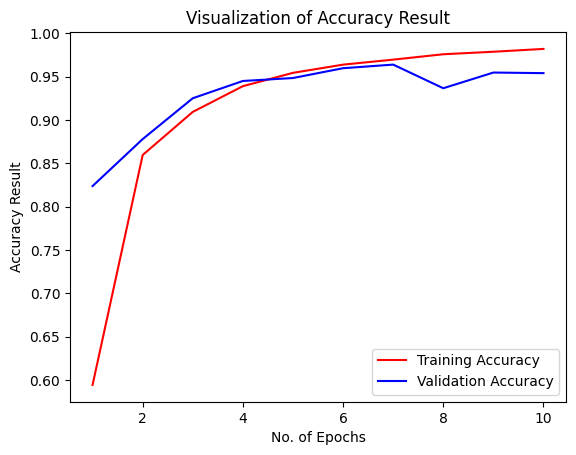

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.savefig("accuracy_plot.png", dpi=200, bbox_inches="tight")
plt.show()

In [ ]:
from google.colab import files
files.download("accuracy_plot.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Some other metrics for model evaluation**

In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step


(array([[9.99313474e-01, 3.45862529e-04, 1.47797067e-07, ...,
         1.12913226e-13, 3.93098618e-12, 4.81366509e-11],
        [9.99957919e-01, 4.20012402e-05, 1.98867123e-09, ...,
         8.09978234e-18, 1.53314820e-13, 6.42661109e-14],
        [9.99913692e-01, 8.63121168e-05, 3.53124596e-09, ...,
         4.18704956e-16, 1.09713269e-12, 2.11149661e-13],
        ...,
        [1.61744680e-11, 3.45037135e-15, 3.98363634e-11, ...,
         3.74719223e-12, 1.21914536e-13, 9.99998450e-01],
        [8.67686944e-13, 7.14662344e-16, 1.27525540e-12, ...,
         4.22140296e-13, 3.44178116e-14, 1.00000000e+00],
        [1.70520946e-14, 1.09652671e-15, 5.31191429e-15, ...,
         1.76960239e-15, 2.64989810e-12, 9.99999881e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.88      0.93       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.97       440
                                   Apple___healthy       0.89      0.98      0.94       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.92      0.

In [ ]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[445,   9,   0, ...,   0,   1,   0],
       [  0, 493,   0, ...,   0,   0,   0],
       [  0,   1, 419, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 465,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   2, ...,   0,   0, 475]])

**Confusion Matrix Visualization**

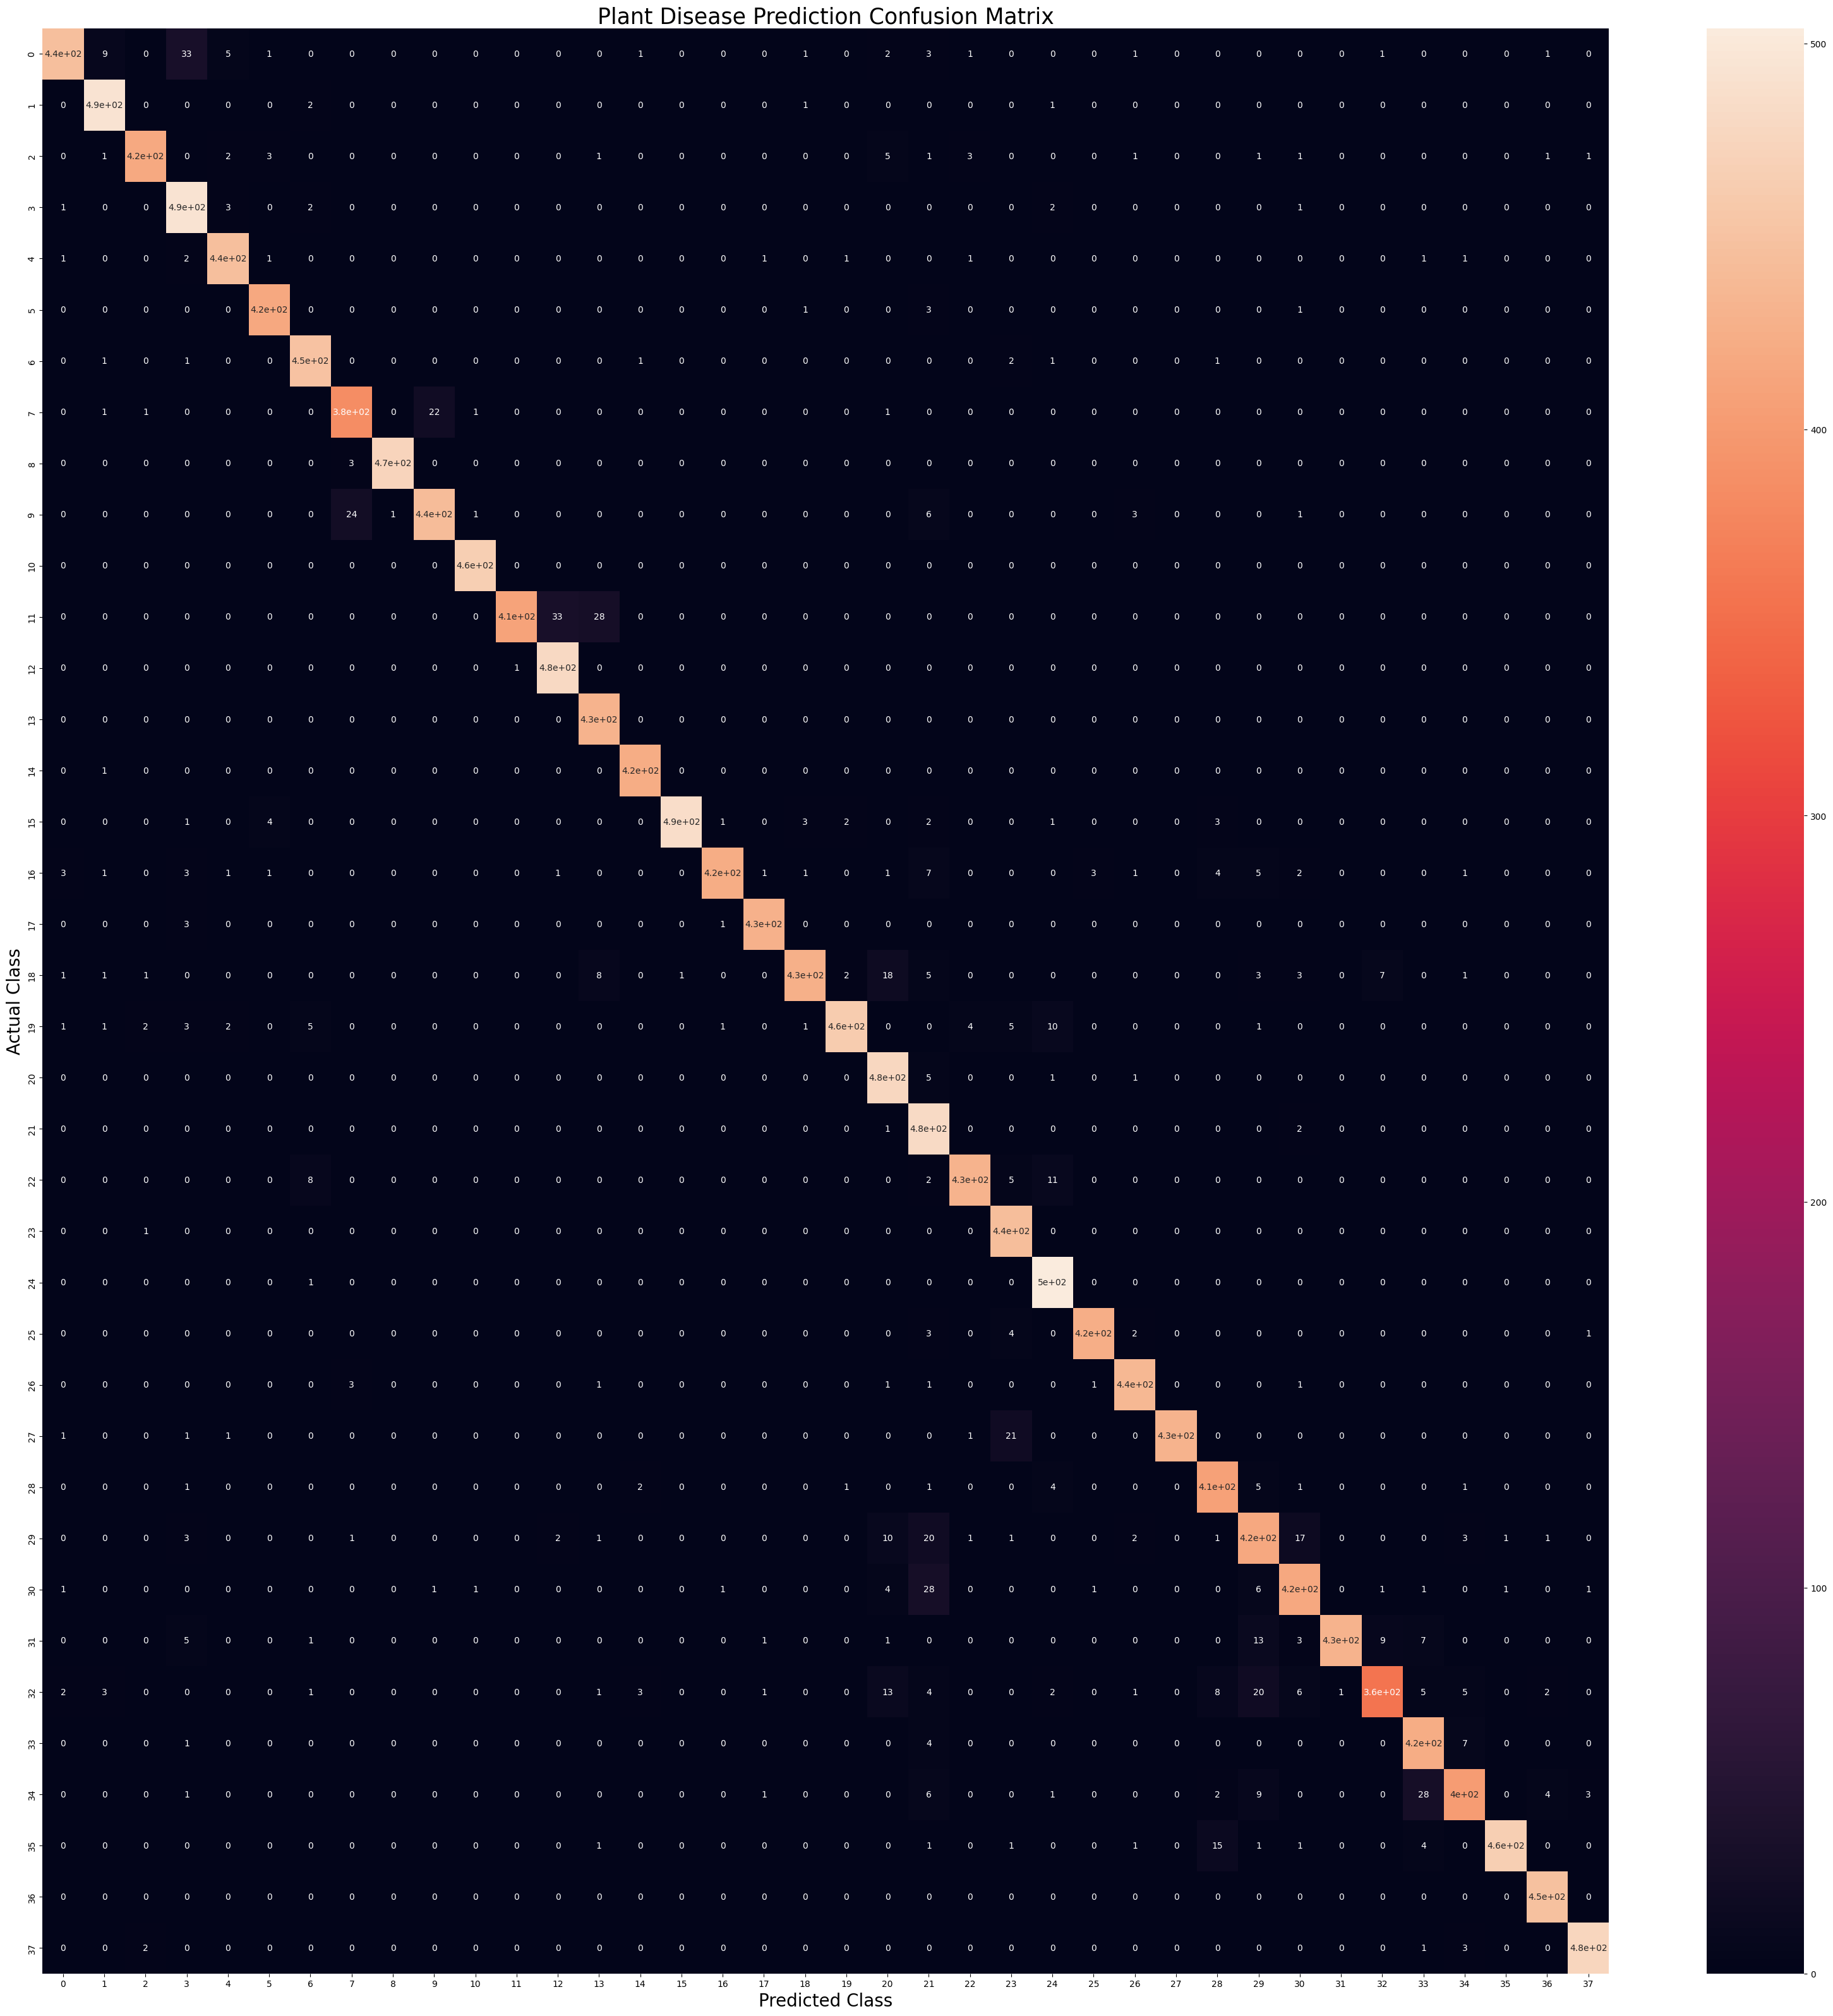

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
from google.colab import files
files.download("confusion_matrix.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Model save in the Google Drive
model.save("/content/drive/MyDrive/plant_disease_model.keras")

In [ ]:
!ls /content/drive/MyDrive | grep plant_disease_model

ls: cannot access '/content/drive/MyDrive': No such file or directory


19-feb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/plant_disease_model.keras")
print("model loaded")


model loaded


In [ ]:
import zipfile, os

ZIP_PATH = "/content/drive/MyDrive/plant_disease/plant_disease.zip"
EXTRACT_PATH = "/content/plant_disease"

with zipfile.ZipFile(ZIP_PATH, 'r') as z:
    z.extractall(EXTRACT_PATH)

print(os.listdir(EXTRACT_PATH))


['plant_disease']


**Create validation_set only**

In [ ]:
# import tensorflow as tf

BASE_DIR = "/content/plant_disease/plant_disease"

validation_set = tf.keras.utils.image_dataset_from_directory(
    BASE_DIR + "/valid",
    labels="inferred",
    label_mode="categorical",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False
)

print("Validation dataset ready")


Found 17572 files belonging to 38 classes.
Validation dataset ready


**Generate predictions for Classification Report**

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in validation_set:
    preds = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("Prediction done")


Prediction done


**Print the classification report**

In [ ]:
print(classification_report(
    y_true,
    y_pred,
    target_names=validation_set.class_names
))


                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.88      0.93       504
                                 Apple___Black_rot       0.96      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.97       440
                                   Apple___healthy       0.89      0.98      0.94       502
                               Blueberry___healthy       0.97      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.98      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.94      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.92      0.

**Class Distribution Plot (Statistical Justification)**

In [ ]:
import os
import matplotlib.pyplot as plt

train_path = "/content/plant_disease/plant_disease/train"

class_counts = {}

for cls in os.listdir(train_path):
    full_path = os.path.join(train_path, cls)
    if os.path.isdir(full_path):   # only count folders
        class_counts[cls] = len(os.listdir(full_path))

plt.figure(figsize=(14,6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Class Distribution (Training Set)")
plt.ylabel("Number of Images")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/plant_disease/plant_disease/train'

In [ ]:
# Drive mount for model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/plant_disease_model.keras")

print("Model loaded successfully")

Model loaded successfully


In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model("/content/drive/MyDrive/plant_disease_model.keras")
print("Model Loaded")

ValueError: File not found: filepath=/content/drive/MyDrive/plant_disease_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
# dataset unzip for test image path
import zipfile, os

ZIP_PATH = "/content/drive/MyDrive/plant_disease/plant_disease.zip"
EXTRACT_PATH = "/content/plant_disease"

with zipfile.ZipFile(ZIP_PATH, 'r') as z:
    z.extractall(EXTRACT_PATH)

BASE_DIR = "/content/plant_disease/plant_disease"
print("Extracted folders:", os.listdir(BASE_DIR))

Extracted folders: ['valid', 'test', 'train']


In [ ]:
#Single image load & show
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# test image path (change filename if needed)
image_path = "/content/plant_disease/plant_disease/test/test/Potato___healthy/0a2d3c8f-3c79-4c4a-8c39-6eac1c7b7f4d.JPG"

img = image.load_img(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/plant_disease/plant_disease/test/test/Potato___healthy/0a2d3c8f-3c79-4c4a-8c39-6eac1c7b7f4d.JPG'

In [ ]:
!ls /content/plant_disease/plant_disease/test

test


In [ ]:
!ls /content/plant_disease/plant_disease/test

test


In [ ]:
!ls /content/plant_disease/plant_disease/test/test

AppleCedarRust1.JPG	PotatoEarlyBlight2.JPG	TomatoEarlyBlight6.JPG
AppleCedarRust2.JPG	PotatoEarlyBlight3.JPG	TomatoHealthy1.JPG
AppleCedarRust3.JPG	PotatoEarlyBlight4.JPG	TomatoHealthy2.JPG
AppleCedarRust4.JPG	PotatoEarlyBlight5.JPG	TomatoHealthy3.JPG
AppleScab1.JPG		PotatoHealthy1.JPG	TomatoHealthy4.JPG
AppleScab2.JPG		PotatoHealthy2.JPG	TomatoYellowCurlVirus1.JPG
AppleScab3.JPG		TomatoEarlyBlight1.JPG	TomatoYellowCurlVirus2.JPG
CornCommonRust1.JPG	TomatoEarlyBlight2.JPG	TomatoYellowCurlVirus3.JPG
CornCommonRust2.JPG	TomatoEarlyBlight3.JPG	TomatoYellowCurlVirus4.JPG
CornCommonRust3.JPG	TomatoEarlyBlight4.JPG	TomatoYellowCurlVirus5.JPG
PotatoEarlyBlight1.JPG	TomatoEarlyBlight5.JPG	TomatoYellowCurlVirus6.JPG


In [ ]:
#single image predict kora
import numpy as np
from tensorflow.keras.preprocessing import image

# choose one image
image_path = "/content/plant_disease/plant_disease/test/test/PotatoHealthy1.JPG"

# Load & resize
img = image.load_img(image_path, target_size=(128,128))
input_arr = image.img_to_array(img)
input_arr = np.expand_dims(input_arr, axis=0)  # batch বানানো

# Predict
prediction = model.predict(input_arr)
result_index = np.argmax(prediction)

print("Predicted index:", result_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted index: 22


In [ ]:
# class name mapping
class_names = [
 'Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust','Apple___healthy',
 'Blueberry___healthy','Cherry_(including_sour)___Powdery_mildew','Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Grape___Black_rot',
 'Grape___Esca_(Black_Measles)','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)','Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)','Peach___Bacterial_spot','Peach___healthy',
 'Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight',
 'Potato___Late_blight','Potato___healthy','Raspberry___healthy','Soybean___healthy',
 'Squash___Powdery_mildew','Strawberry___Leaf_scorch','Strawberry___healthy','Tomato___Bacterial_spot',
 'Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy'
]

pred_name = class_names[result_index]
print("Predicted class:", pred_name)

Predicted class: Potato___healthy


In [ ]:
# Confidence (probability %)
conf = float(np.max(prediction))
print("Confidence:", round(conf*100, 2), "%")

Confidence: 99.97 %


In [ ]:
import matplotlib.pyplot as plt

# original image load (without resize)
orig_img = image.load_img(image_path)

plt.imshow(orig_img)
plt.title(f"Predicted: {pred_name}\nConfidence: {round(conf*100,2)}%")
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/plant_disease/plant_disease/test/test/Potato___healthy/0a2d3c8f-3c79-4c4a-8c39-6eac1c7b7f4d.JPG'

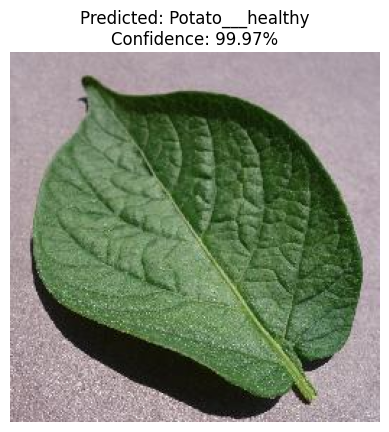

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# correct image path
image_path = "/content/plant_disease/plant_disease/test/test/PotatoHealthy1.JPG"

orig_img = image.load_img(image_path)

plt.imshow(orig_img)
plt.title(f"Predicted: {pred_name}\nConfidence: {round(conf*100,2)}%")
plt.axis("off")
plt.show()

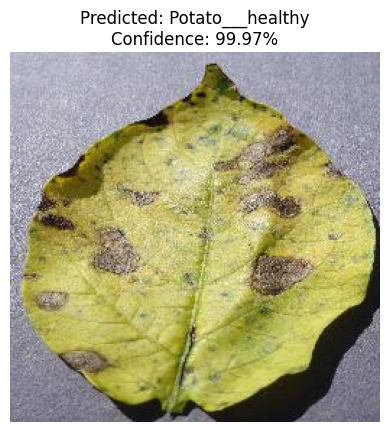

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# correct image path
image_path = "/content/plant_disease/plant_disease/test/test/PotatoEarlyBlight4.JPG"

orig_img = image.load_img(image_path)

plt.imshow(orig_img)
plt.title(f"Predicted: {pred_name}\nConfidence: {round(conf*100,2)}%")
plt.axis("off")
plt.show()

File: PotatoEarlyBlight4.JPG


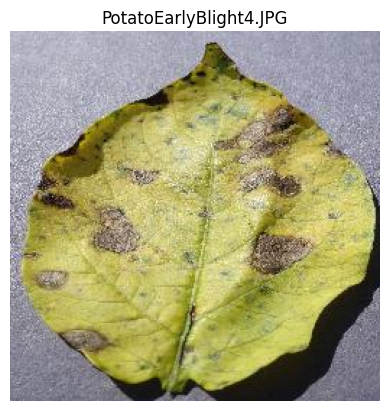

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

image_path = "/content/plant_disease/plant_disease/test/test/PotatoEarlyBlight4.JPG"

print("File:", os.path.basename(image_path))

img_show = image.load_img(image_path)
plt.imshow(img_show)
plt.title(os.path.basename(image_path))
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

image_path = "/content/plant_disease/plant_disease/test/test/PotatoEarlyBlight4.JPG"

img = image.load_img(image_path, target_size=(128,128))
arr = image.img_to_array(img)
arr = np.expand_dims(arr, axis=0)

pred = model.predict(arr, verbose=0)[0]

top5 = np.argsort(pred)[-5:][::-1]
for i in top5:
    print(i, class_names[i], round(float(pred[i])*100, 3), "%")

20 Potato___Early_blight 100.0 %
30 Tomato___Late_blight 0.0 %
32 Tomato___Septoria_leaf_spot 0.0 %
0 Apple___Apple_scab 0.0 %
13 Grape___Leaf_blight_(Isariopsis_Leaf_Spot) 0.0 %


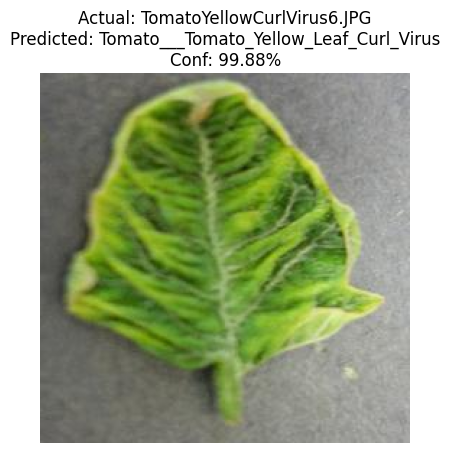

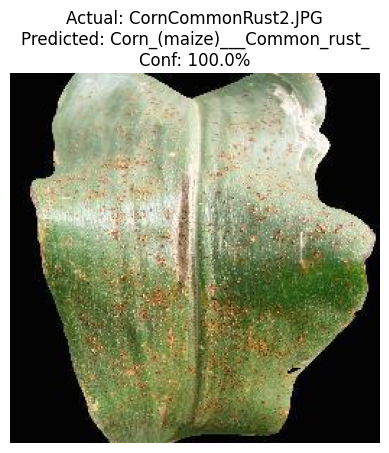

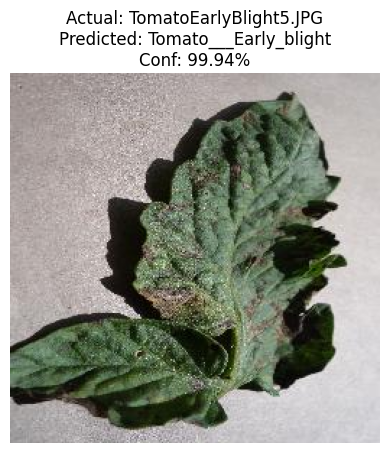

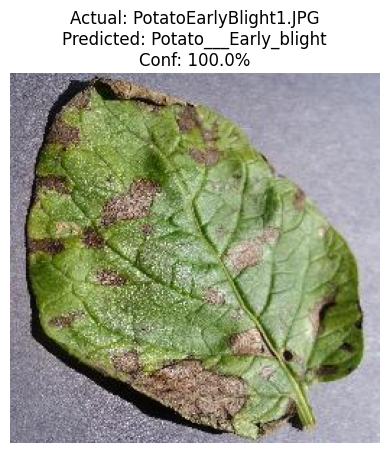

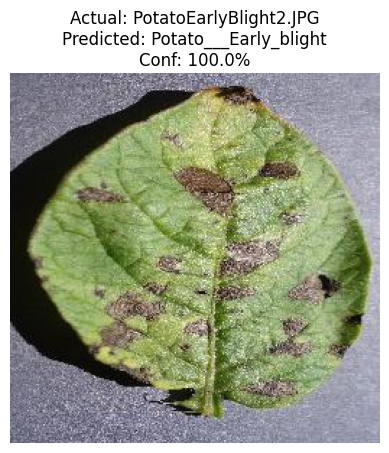

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

test_folder = "/content/plant_disease/plant_disease/test/test"

all_images = os.listdir(test_folder)
sample_images = random.sample(all_images, 5)

for img_name in sample_images:
    image_path = os.path.join(test_folder, img_name)

    img = image.load_img(image_path, target_size=(128,128))
    arr = image.img_to_array(img)
    arr = np.expand_dims(arr, axis=0)

    pred = model.predict(arr, verbose=0)
    idx = np.argmax(pred)
    conf = np.max(pred)

    # show image
    orig = image.load_img(image_path)
    plt.figure()
    plt.imshow(orig)
    plt.title(f"Actual: {img_name}\nPredicted: {class_names[idx]}\nConf: {round(float(conf)*100,2)}%")
    plt.axis("off")
    plt.show()

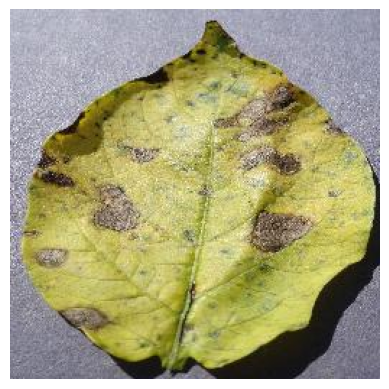

Real image predicted: 20 Potato___Early_blight conf 100.0 %
Noise image predicted: 37 Tomato___healthy conf 99.88 %


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# pick ONE image
image_path = "/content/plant_disease/plant_disease/test/test/PotatoEarlyBlight4.JPG"

# load image
img = image.load_img(image_path)
plt.imshow(img); plt.axis("off"); plt.show()

# make input
x = image.load_img(image_path, target_size=(128,128))
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)

# prediction 1
p1 = model.predict(x, verbose=0)[0]
i1 = int(np.argmax(p1))

# random noise image (same shape)
noise = np.random.randint(0, 256, (1,128,128,3)).astype(np.float32)

# prediction 2
p2 = model.predict(noise, verbose=0)[0]
i2 = int(np.argmax(p2))

print("Real image predicted:", i1, class_names[i1], "conf", round(float(np.max(p1))*100,2), "%")
print("Noise image predicted:", i2, class_names[i2], "conf", round(float(np.max(p2))*100,2), "%")

In [ ]:
import shutil

old_path = "/content/plant_disease/plant_disease/test/test/PotatoEarlyBlight4.JPG"
new_path = "/content/plant_disease/plant_disease/test/test/random_name_abc.JPG"

shutil.copy(old_path, new_path)

# predict renamed image
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img(new_path, target_size=(128,128))
arr = image.img_to_array(img)
arr = np.expand_dims(arr, axis=0)

pred = model.predict(arr, verbose=0)
idx = np.argmax(pred)

print("Predicted after rename:", class_names[idx])

Predicted after rename: Potato___Early_blight


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

image_path = "/content/plant_disease/plant_disease/test/test/PotatoEarlyBlight4.JPG"

img = image.load_img(image_path, target_size=(128,128))
arr = image.img_to_array(img)
arr = np.expand_dims(arr, axis=0)

pred = model.predict(arr, verbose=0)[0]
top3 = np.argsort(pred)[-3:][::-1]

for i in top3:
    print(class_names[i], round(float(pred[i])*100, 3), "%")

Potato___Early_blight 100.0 %
Tomato___Late_blight 0.0 %
Tomato___Septoria_leaf_spot 0.0 %
